In [1]:
%matplotlib notebook

### Load synthetic dynamic network

In [2]:
from dynetlsm.datasets import simple_splitting_dynamic_network

Y, labels = simple_splitting_dynamic_network(n_nodes=50, n_time_steps=4)

### Initialize the LSM model and run the Gibbs sampler

In [9]:
from dynetlsm import DynamicNetworkLSM

lsm = DynamicNetworkLSM(n_iter=5000, burn=2500, tune=2500,
                        n_features=2, random_state=42).fit(Y)

100%|██████████| 9999/9999 [02:43<00:00, 61.22it/s]


### Plot traces to assess model convergence

<IPython.core.display.Javascript object>


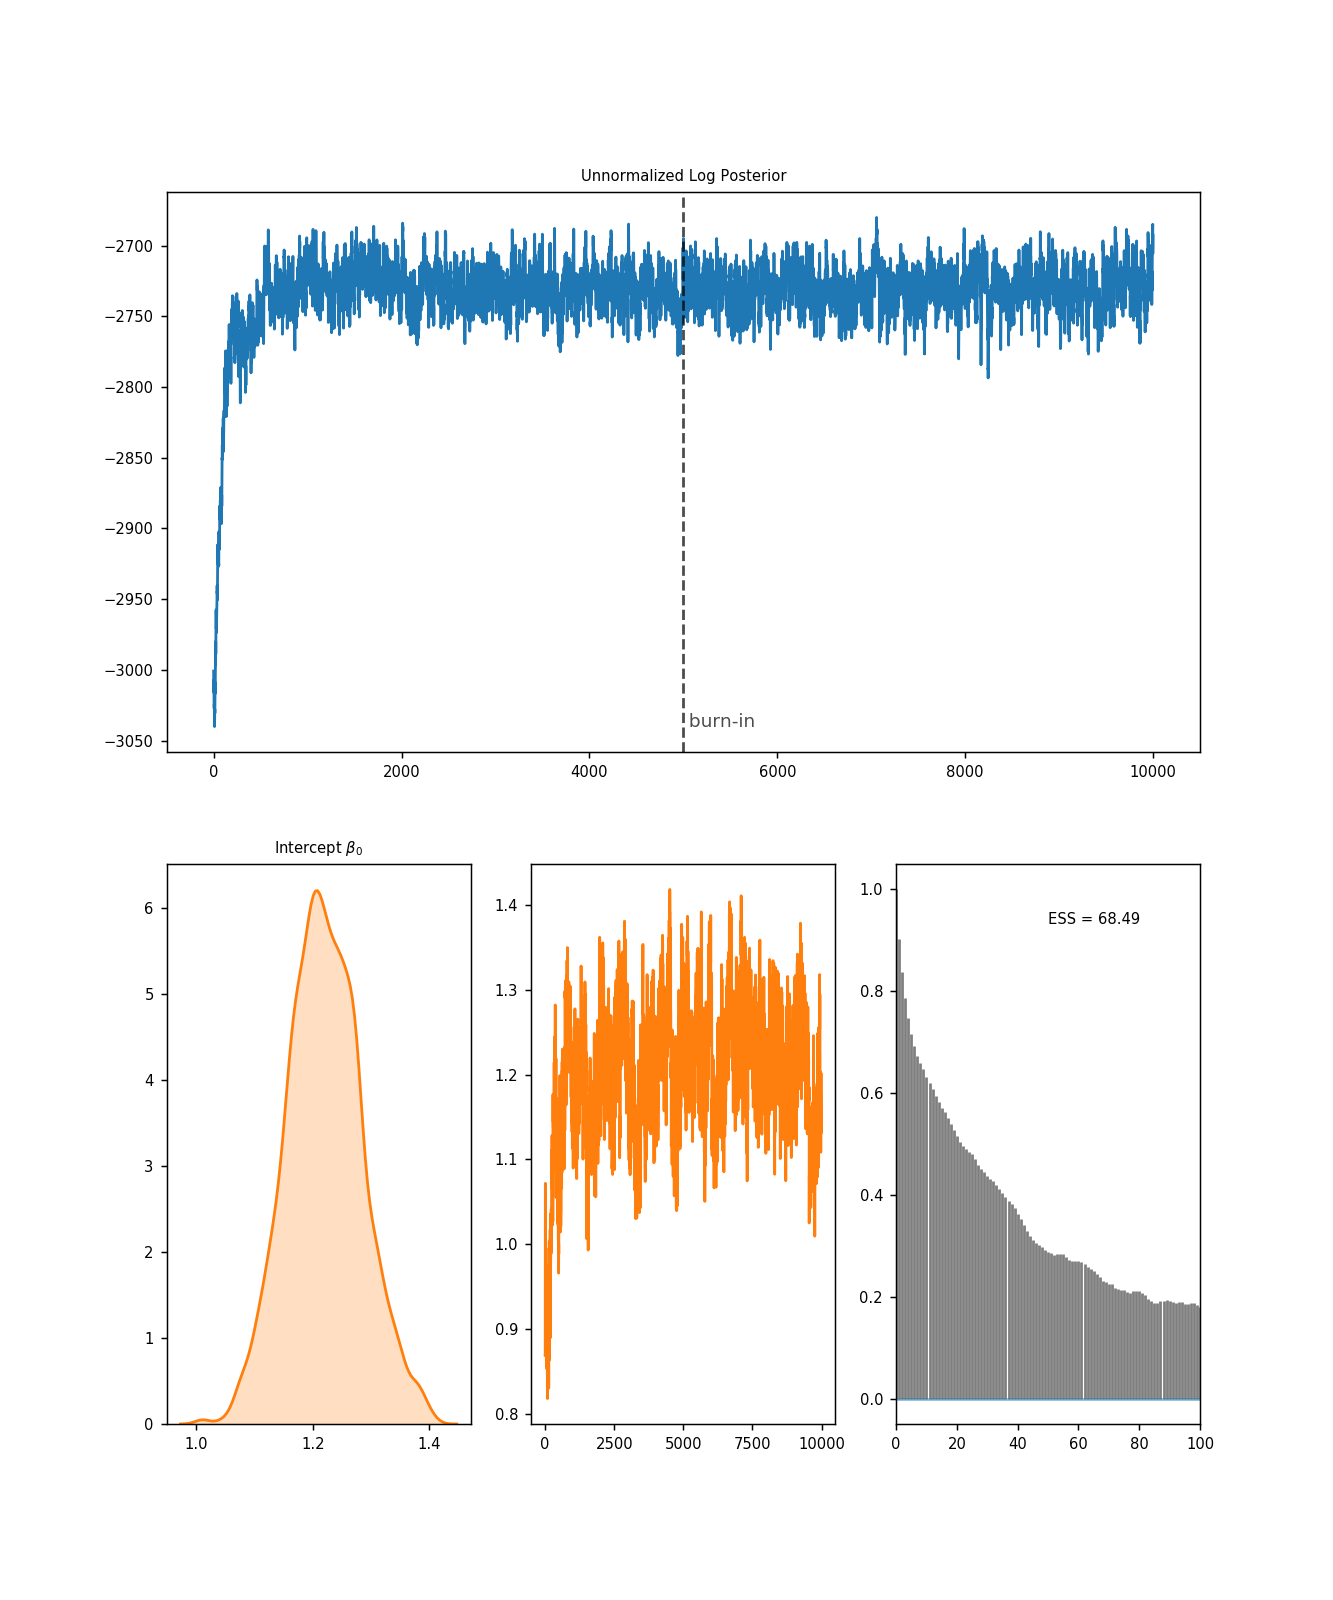

In [10]:
from dynetlsm.plots import plot_traces

plot_traces(lsm)

### Visualize the infered latent space

<IPython.core.display.Javascript object>


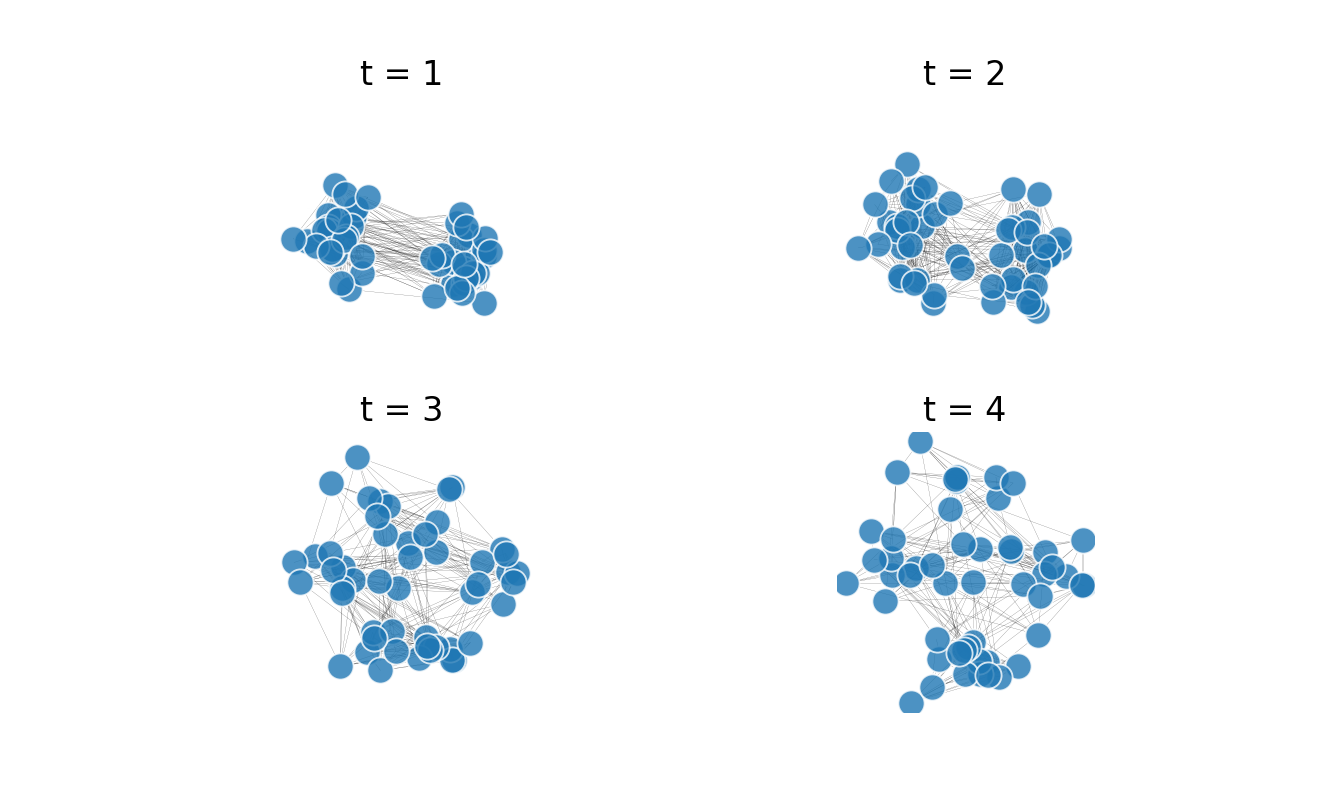

In [13]:
from dynetlsm.plots import plot_latent_space

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
for t, ax in enumerate(axes.flat):
    plot_latent_space(lsm, t=t, connectionstyle=None, number_nodes=False, 
                      linewidth=0.1, node_size=200, border=0.2, ax=ax)

### Initialize the HDP-LPCM and run the Gibbs sampler

In [14]:
from dynetlsm import DynamicNetworkHDPLPCM

lpcm = DynamicNetworkHDPLPCM(random_state=42).fit(Y)

100%|██████████| 9999/9999 [09:44<00:00, 17.11it/s]


<IPython.core.display.Javascript object>


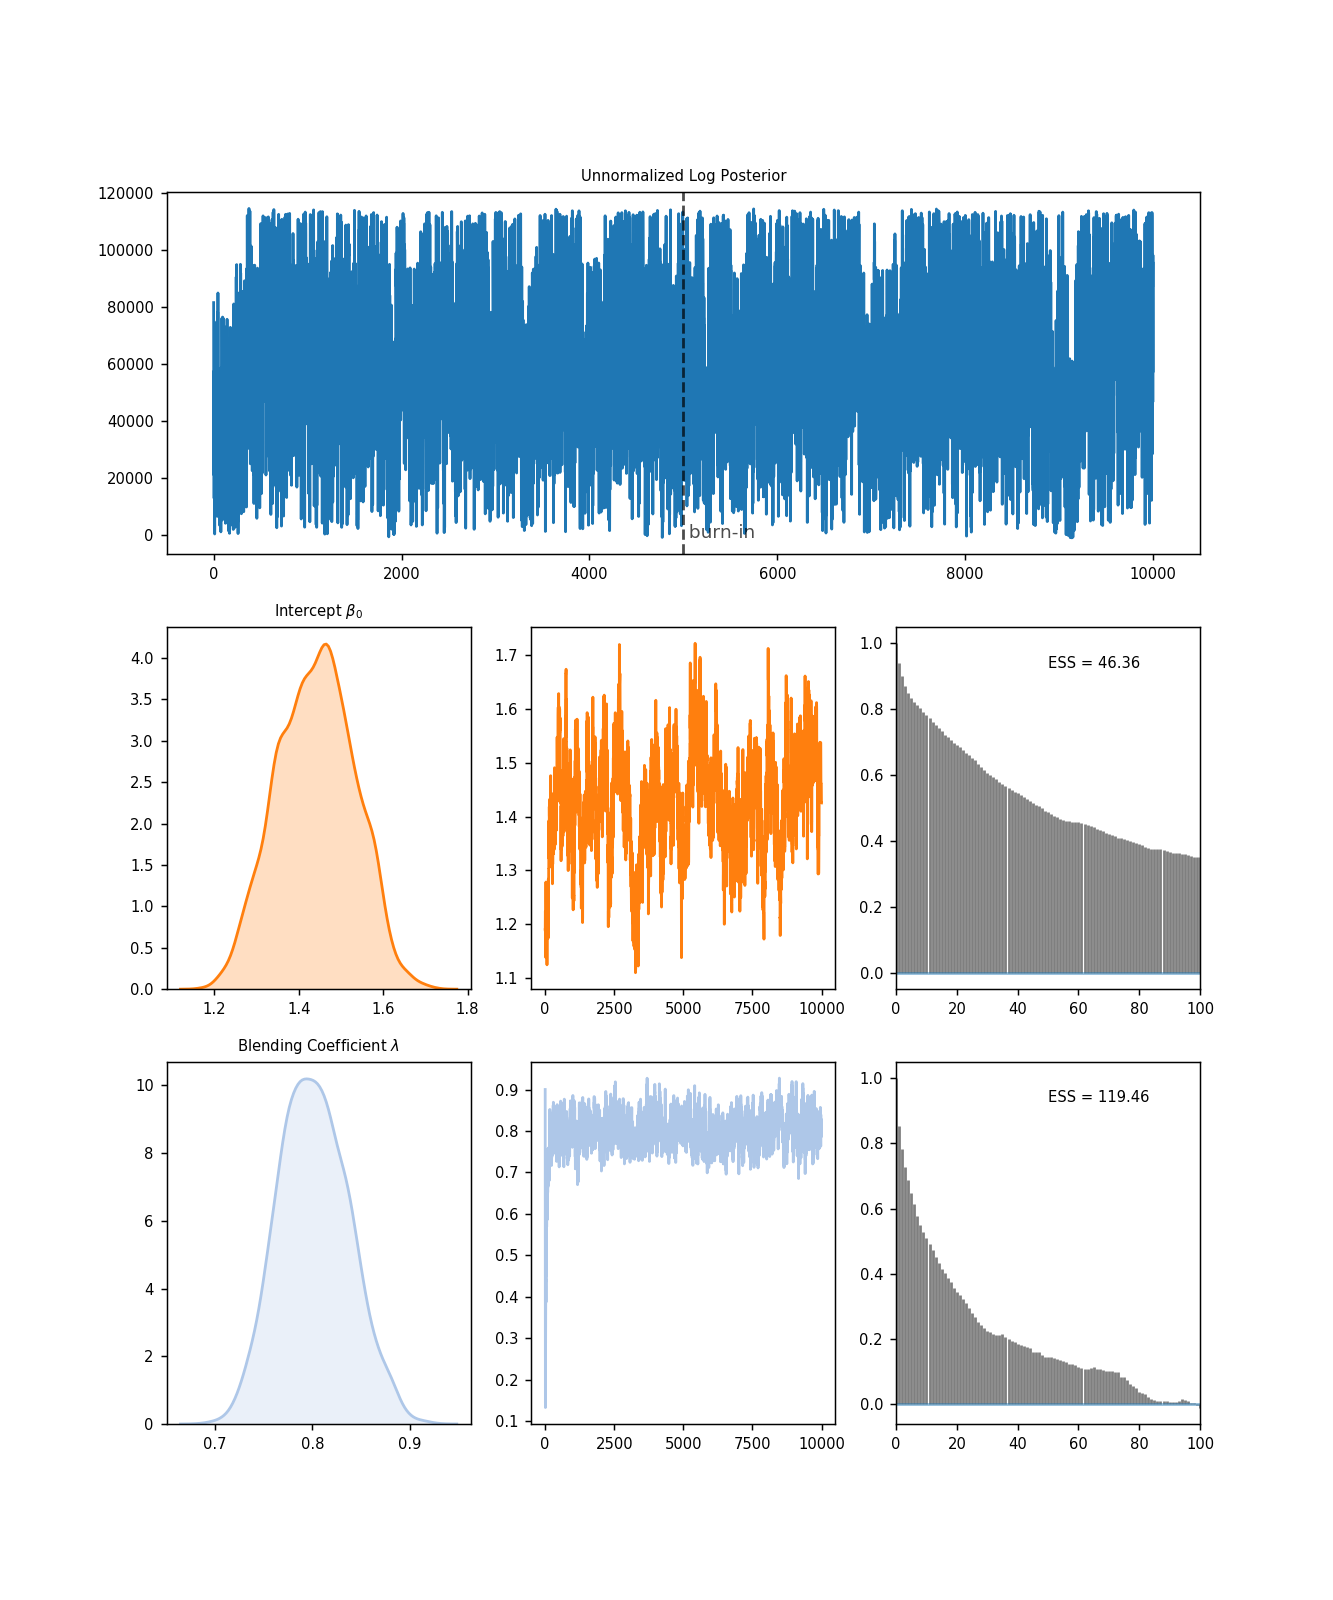

(<Figure size 1000x1200 with 7 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12db91450>,
         None, None],
       dtype=object))

In [15]:
from dynetlsm.plots import plot_traces

plot_traces(lpcm)

### Visualize the inferred latent space

<IPython.core.display.Javascript object>


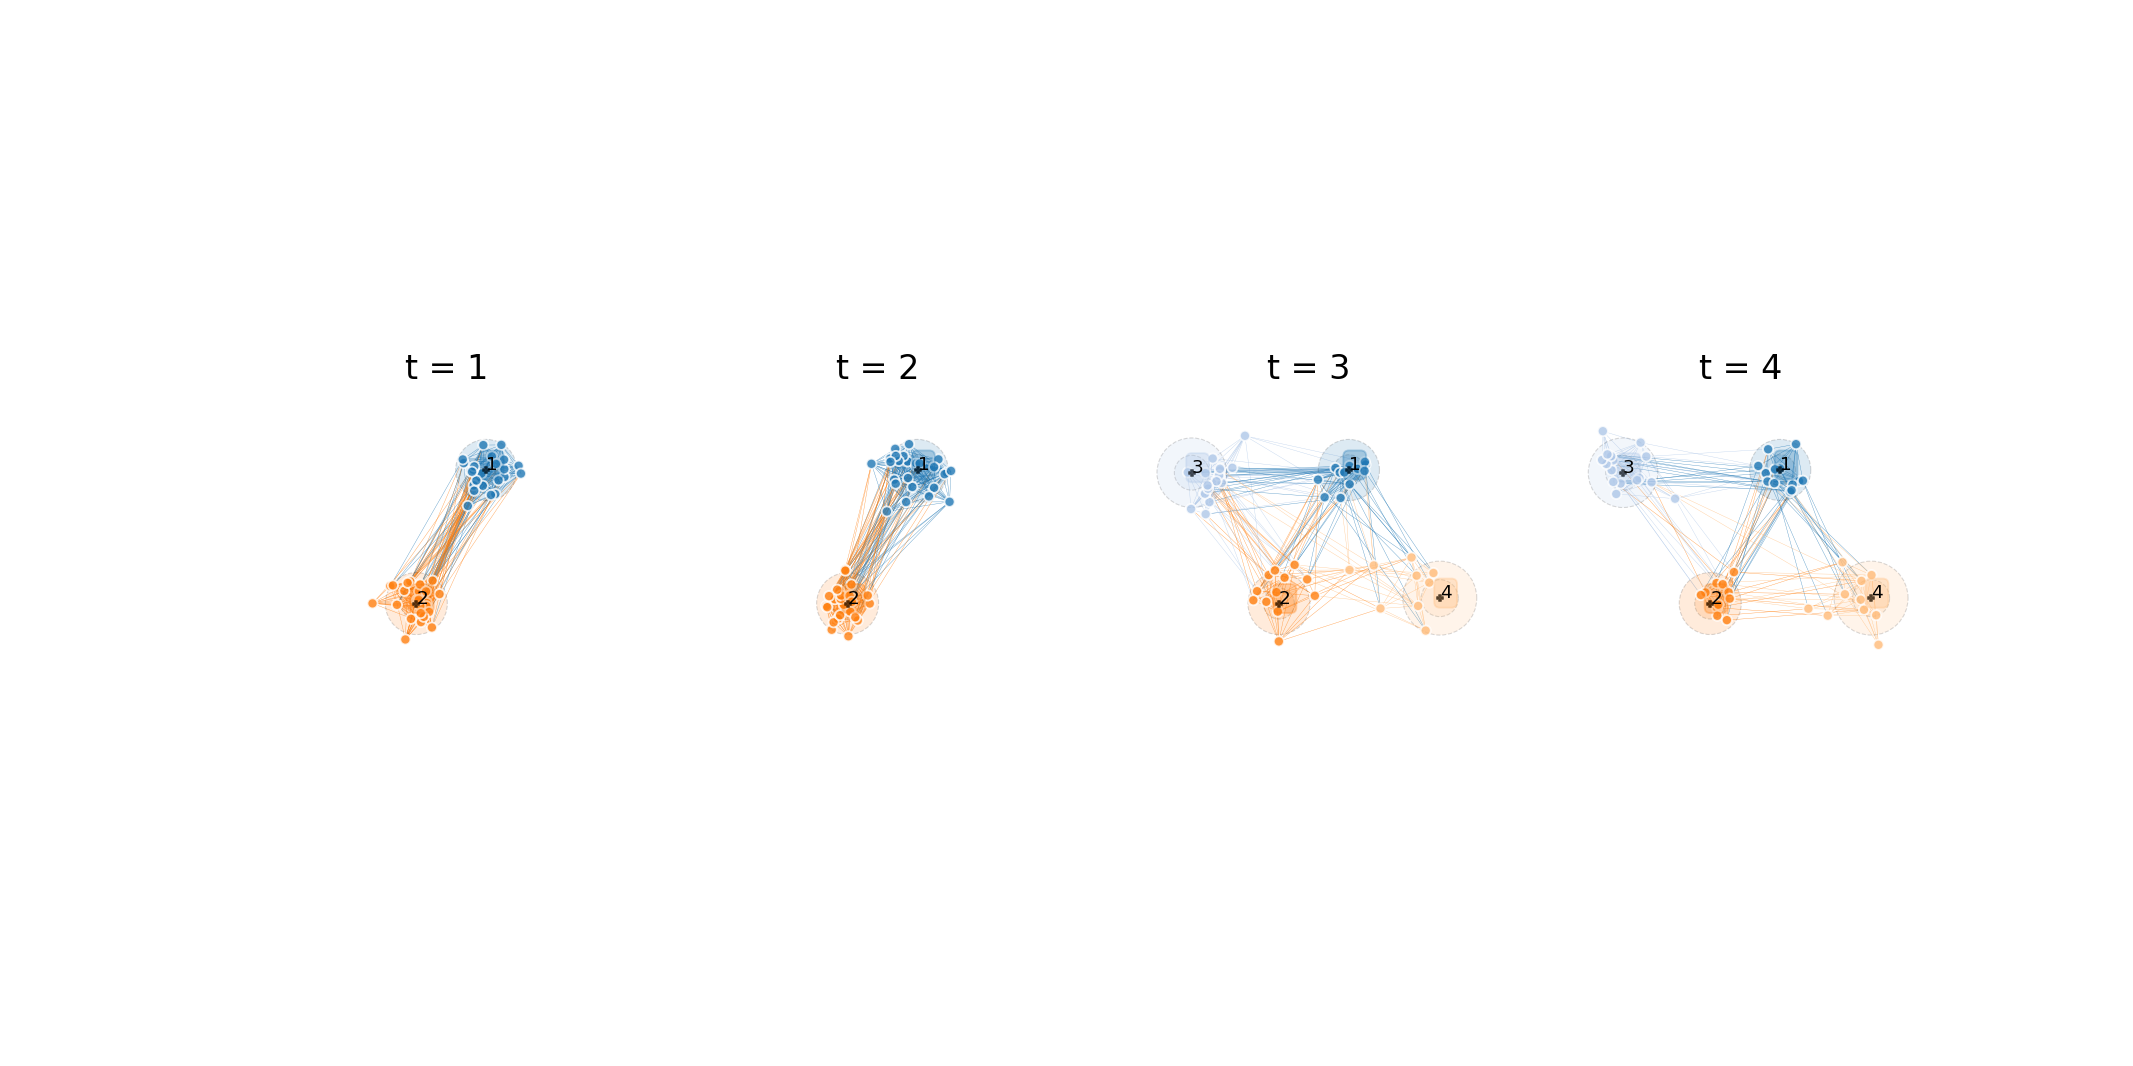

In [43]:
from dynetlsm.plots import plot_latent_space

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(16, 8))
for t, ax in enumerate(axes.flat):
    plot_latent_space(lpcm, t=t, connectionstyle=None, 
                      number_nodes=False, border=1.0, linewidth=0.2, 
                      center_size=10,
                      node_size=30, ax=ax)
fig.savefig('/Users/joshua/test.png', dpi=100)

### Visualize the community dynamics with an Alluvial diagram

<IPython.core.display.Javascript object>


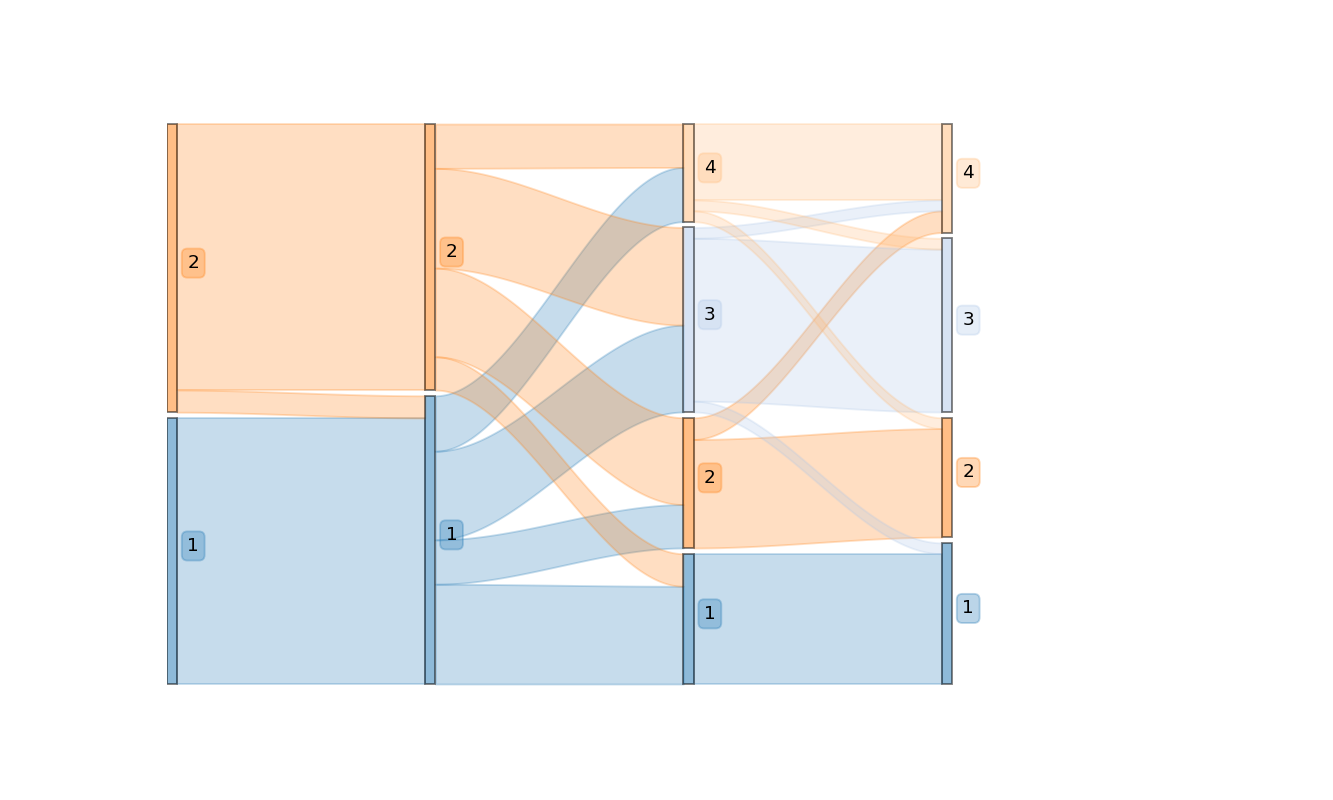

In [45]:
from dynetlsm.plots import alluvial_plot

fig, ax = alluvial_plot(lpcm.z_)

fig.savefig('/Users/joshua/myworkspace/hdp-latent-space-network-paper/presentations/jsm2020/images/intro_alluvial.png',
            dpi=100)

In [48]:
import pickle

pickle.dump(lpcm, open('test_model.pkl', 'wb'))

In [3]:
import pickle

lpcm = pickle.load(open('test_model.pkl', 'rb'))

In [14]:
lpcm.posterior_group_counts_[2]

lpcm.posterior_group_ids_[2]

array([4, 5, 6, 7, 8])

<IPython.core.display.Javascript object>


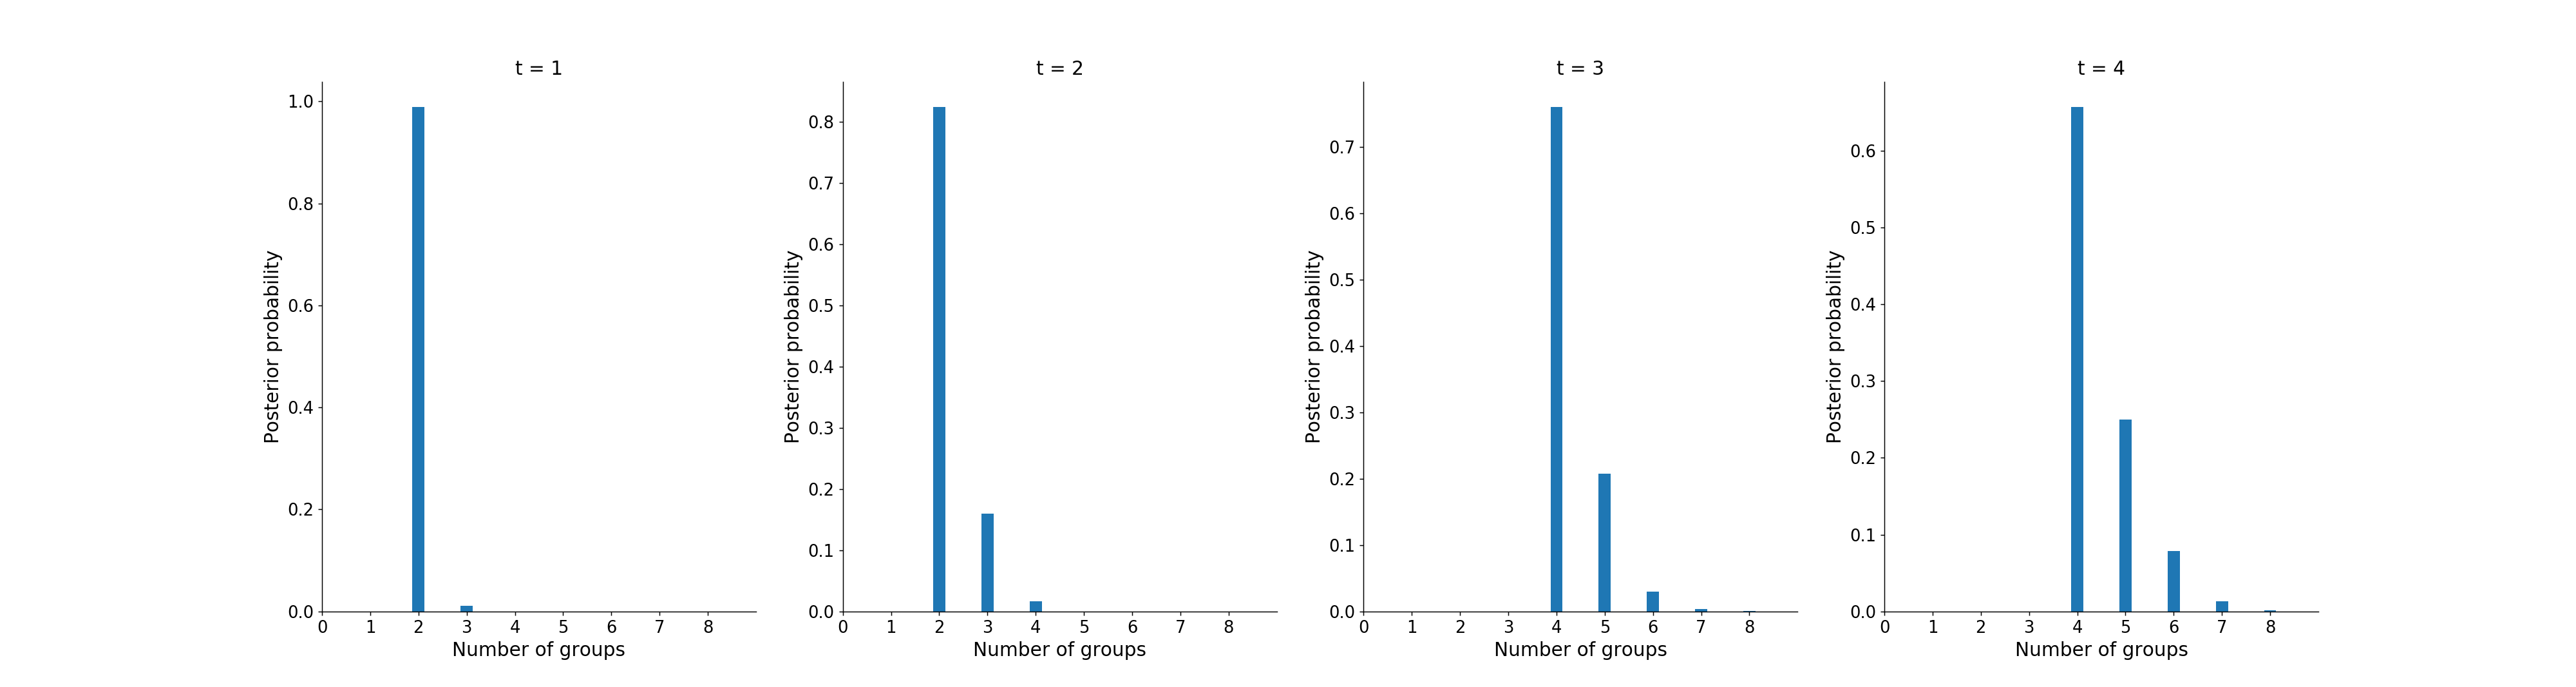

In [25]:
from dynetlsm.plots import plot_posterior_counts

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(30, 8))
for t in range(Y.shape[0]):
    plot_posterior_counts(lpcm, t=t, normalize=True, ax=axes.flat[t])
    axes.flat[t].set_xlim(0, 9)
    axes.flat[t].set_xticks(np.arange(0, 9))
    
fig.savefig('/Users/joshua/myworkspace/hdp-latent-space-network-paper/presentations/jsm2020/images/intro_posterior.png',
           dpi=100)

In [9]:
?plot_posterior_counts

In [20]:
ax = axes.flat[t]

In [ ]:
ax.set_xticks